In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.python.keras.layers.core import Dense, Activation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
air_quality = pd.read_csv("/content/drive/MyDrive/fprojdata - final project data.csv", sep=",", decimal=",")
air_quality

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
0,3/10/2020,18:00:00,2.6,150,11.9,166,113,13.6,48.9,0.7578
1,3/10/2020,19:00:00,2,112,9.4,103,92,13.3,47.7,0.7255
2,3/10/2020,20:00:00,2.2,88,9,131,114,11.9,54,0.7502
3,3/10/2020,21:00:00,2.2,80,9.2,172,122,11,60,0.7867
4,3/10/2020,22:00:00,1.6,51,6.5,131,116,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2021,10:00:00,3.1,-200,13.5,472,190,21.9,29.3,0.7568
9353,4/4/2021,11:00:00,2.4,-200,11.4,353,179,24.3,23.7,0.7119
9354,4/4/2021,12:00:00,2.4,-200,12.4,293,175,26.9,18.3,0.6406
9355,4/4/2021,13:00:00,2.1,-200,9.5,235,156,28.3,13.5,0.5139


In [ ]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

In [ ]:
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
0,3/10/2020,18:00:00,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
1,3/10/2020,19:00:00,2,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2,3/10/2020,20:00:00,2.2,88.0,9,131.0,114.0,11.9,54,0.7502
3,3/10/2020,21:00:00,2.2,80.0,9.2,172.0,122.0,11,60,0.7867
4,3/10/2020,22:00:00,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2021,10:00:00,3.1,NaN,13.5,472.0,190.0,21.9,29.3,0.7568
9353,4/4/2021,11:00:00,2.4,NaN,11.4,353.0,179.0,24.3,23.7,0.7119
9354,4/4/2021,12:00:00,2.4,NaN,12.4,293.0,175.0,26.9,18.3,0.6406
9355,4/4/2021,13:00:00,2.1,NaN,9.5,235.0,156.0,28.3,13.5,0.5139


In [ ]:
air_quality.fillna(air_quality.mean(), inplace= True)

In [ ]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
0,3/10/2020,18:00:00,2.6,150.000000,11.9,166.0,113.0,13.6,48.9,0.7578
1,3/10/2020,19:00:00,2,112.000000,9.4,103.0,92.0,13.3,47.7,0.7255
2,3/10/2020,20:00:00,2.2,88.000000,9,131.0,114.0,11.9,54,0.7502
3,3/10/2020,21:00:00,2.2,80.000000,9.2,172.0,122.0,11,60,0.7867
4,3/10/2020,22:00:00,1.6,51.000000,6.5,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2021,10:00:00,3.1,218.811816,13.5,472.0,190.0,21.9,29.3,0.7568
9353,4/4/2021,11:00:00,2.4,218.811816,11.4,353.0,179.0,24.3,23.7,0.7119
9354,4/4/2021,12:00:00,2.4,218.811816,12.4,293.0,175.0,26.9,18.3,0.6406
9355,4/4/2021,13:00:00,2.1,218.811816,9.5,235.0,156.0,28.3,13.5,0.5139


In [ ]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%m/%d/%Y'))
air_quality.dtypes

Date        object
Time        object
CO          object
PM 10      float64
NO          object
NOx        float64
PM 2.5     float64
SO2         object
NO2         object
Benzene     object
dtype: object

In [ ]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

In [ ]:
air_quality['Date']=air_quality['Date'].astype(float)
air_quality.dtypes
air_quality

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
0,1.583798e+18,18:00:00,2.6,150.000000,11.9,166.0,113.0,13.6,48.9,0.7578
1,1.583798e+18,19:00:00,2,112.000000,9.4,103.0,92.0,13.3,47.7,0.7255
2,1.583798e+18,20:00:00,2.2,88.000000,9,131.0,114.0,11.9,54,0.7502
3,1.583798e+18,21:00:00,2.2,80.000000,9.2,172.0,122.0,11,60,0.7867
4,1.583798e+18,22:00:00,1.6,51.000000,6.5,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,1.617494e+18,10:00:00,3.1,218.811816,13.5,472.0,190.0,21.9,29.3,0.7568
9353,1.617494e+18,11:00:00,2.4,218.811816,11.4,353.0,179.0,24.3,23.7,0.7119
9354,1.617494e+18,12:00:00,2.4,218.811816,12.4,293.0,175.0,26.9,18.3,0.6406
9355,1.617494e+18,13:00:00,2.1,218.811816,9.5,235.0,156.0,28.3,13.5,0.5139


In [ ]:
 air_quality.loc[:,'Time']=air_quality['Time']
 air_quality

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
0,1.583798e+18,18:00:00,2.6,150.000000,11.9,166.0,113.0,13.6,48.9,0.7578
1,1.583798e+18,19:00:00,2,112.000000,9.4,103.0,92.0,13.3,47.7,0.7255
2,1.583798e+18,20:00:00,2.2,88.000000,9,131.0,114.0,11.9,54,0.7502
3,1.583798e+18,21:00:00,2.2,80.000000,9.2,172.0,122.0,11,60,0.7867
4,1.583798e+18,22:00:00,1.6,51.000000,6.5,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,1.617494e+18,10:00:00,3.1,218.811816,13.5,472.0,190.0,21.9,29.3,0.7568
9353,1.617494e+18,11:00:00,2.4,218.811816,11.4,353.0,179.0,24.3,23.7,0.7119
9354,1.617494e+18,12:00:00,2.4,218.811816,12.4,293.0,175.0,26.9,18.3,0.6406
9355,1.617494e+18,13:00:00,2.1,218.811816,9.5,235.0,156.0,28.3,13.5,0.5139


In [ ]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H:%M:%S'))
air_quality.dtypes

Date       float64
Time        object
CO          object
PM 10      float64
NO          object
NOx        float64
PM 2.5     float64
SO2         object
NO2         object
Benzene     object
dtype: object

In [ ]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

In [ ]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality['CO'] = pd.to_numeric(air_quality['CO'],errors = 'coerce')
air_quality['Benzene'] = pd.to_numeric(air_quality['Benzene'],errors = 'coerce')
air_quality['SO2'] = pd.to_numeric(air_quality['SO2'],errors = 'coerce')
air_quality['NO2'] = pd.to_numeric(air_quality['NO2'],errors = 'coerce')
air_quality['NO'] = pd.to_numeric(air_quality['NO'],errors = 'coerce')
air_quality.dtypes

Date       float64
Time       float64
CO         float64
PM 10      float64
NO         float64
NOx        float64
PM 2.5     float64
SO2        float64
NO2        float64
Benzene    float64
dtype: object

In [ ]:
air_quality.tail()

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
9352,1.617494e+18,-2.208953e+18,3.1,218.811816,13.5,472.0,190.0,21.9,29.3,0.7568
9353,1.617494e+18,-2.208949e+18,2.4,218.811816,11.4,353.0,179.0,24.3,23.7,0.7119
9354,1.617494e+18,-2.208946e+18,2.4,218.811816,12.4,293.0,175.0,26.9,18.3,0.6406
9355,1.617494e+18,-2.208942e+18,2.1,218.811816,9.5,235.0,156.0,28.3,13.5,0.5139
9356,1.617494e+18,-2.208938e+18,2.2,218.811816,11.9,265.0,168.0,28.5,13.1,0.5028


In [ ]:
air_quality2=air_quality.corr('pearson')
air_quality2

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
Date,1.000000,-0.003249,0.136477,0.008010,-0.074488,0.401280,0.349315,-0.153080,0.009774,-0.067346
Time,-0.003249,1.000000,0.075984,0.102758,0.046087,0.200493,0.327673,0.027230,-0.108776,-0.013764
CO,0.136477,0.075984,1.000000,0.023639,-0.031378,0.100831,0.090068,-0.068939,-0.048227,-0.045892
PM 10,0.008010,0.102758,0.023639,1.000000,0.048215,0.098180,0.156510,0.011851,-0.018969,-0.001185
NO,-0.074488,0.046087,-0.031378,0.048215,1.000000,0.011178,0.008160,0.971375,0.925062,0.984555
NOx,0.401280,0.200493,0.100831,0.098180,0.011178,1.000000,0.763074,-0.144437,-0.029792,-0.100514
PM 2.5,0.349315,0.327673,0.090068,0.156510,0.008160,0.763074,1.000000,-0.119172,-0.109536,-0.090750
SO2,-0.153080,0.027230,-0.068939,0.011851,0.971375,-0.144437,-0.119172,1.000000,0.885911,0.981001
NO2,0.009774,-0.108776,-0.048227,-0.018969,0.925062,-0.029792,-0.109536,0.885911,1.000000,0.943995
Benzene,-0.067346,-0.013764,-0.045892,-0.001185,0.984555,-0.100514,-0.090750,0.981001,0.943995,1.000000


In [ ]:
abs(air_quality2['PM 2.5']).sort_values(ascending=False)

PM 2.5     1.000000
NOx        0.763074
Date       0.349315
Time       0.327673
PM 10      0.156510
SO2        0.119172
NO2        0.109536
Benzene    0.090750
CO         0.090068
NO         0.008160
Name: PM 2.5, dtype: float64

In [ ]:
air_quality.tail()

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
9352,1.617494e+18,-2.208953e+18,3.1,218.811816,13.5,472.0,190.0,21.9,29.3,0.7568
9353,1.617494e+18,-2.208949e+18,2.4,218.811816,11.4,353.0,179.0,24.3,23.7,0.7119
9354,1.617494e+18,-2.208946e+18,2.4,218.811816,12.4,293.0,175.0,26.9,18.3,0.6406
9355,1.617494e+18,-2.208942e+18,2.1,218.811816,9.5,235.0,156.0,28.3,13.5,0.5139
9356,1.617494e+18,-2.208938e+18,2.2,218.811816,11.9,265.0,168.0,28.5,13.1,0.5028


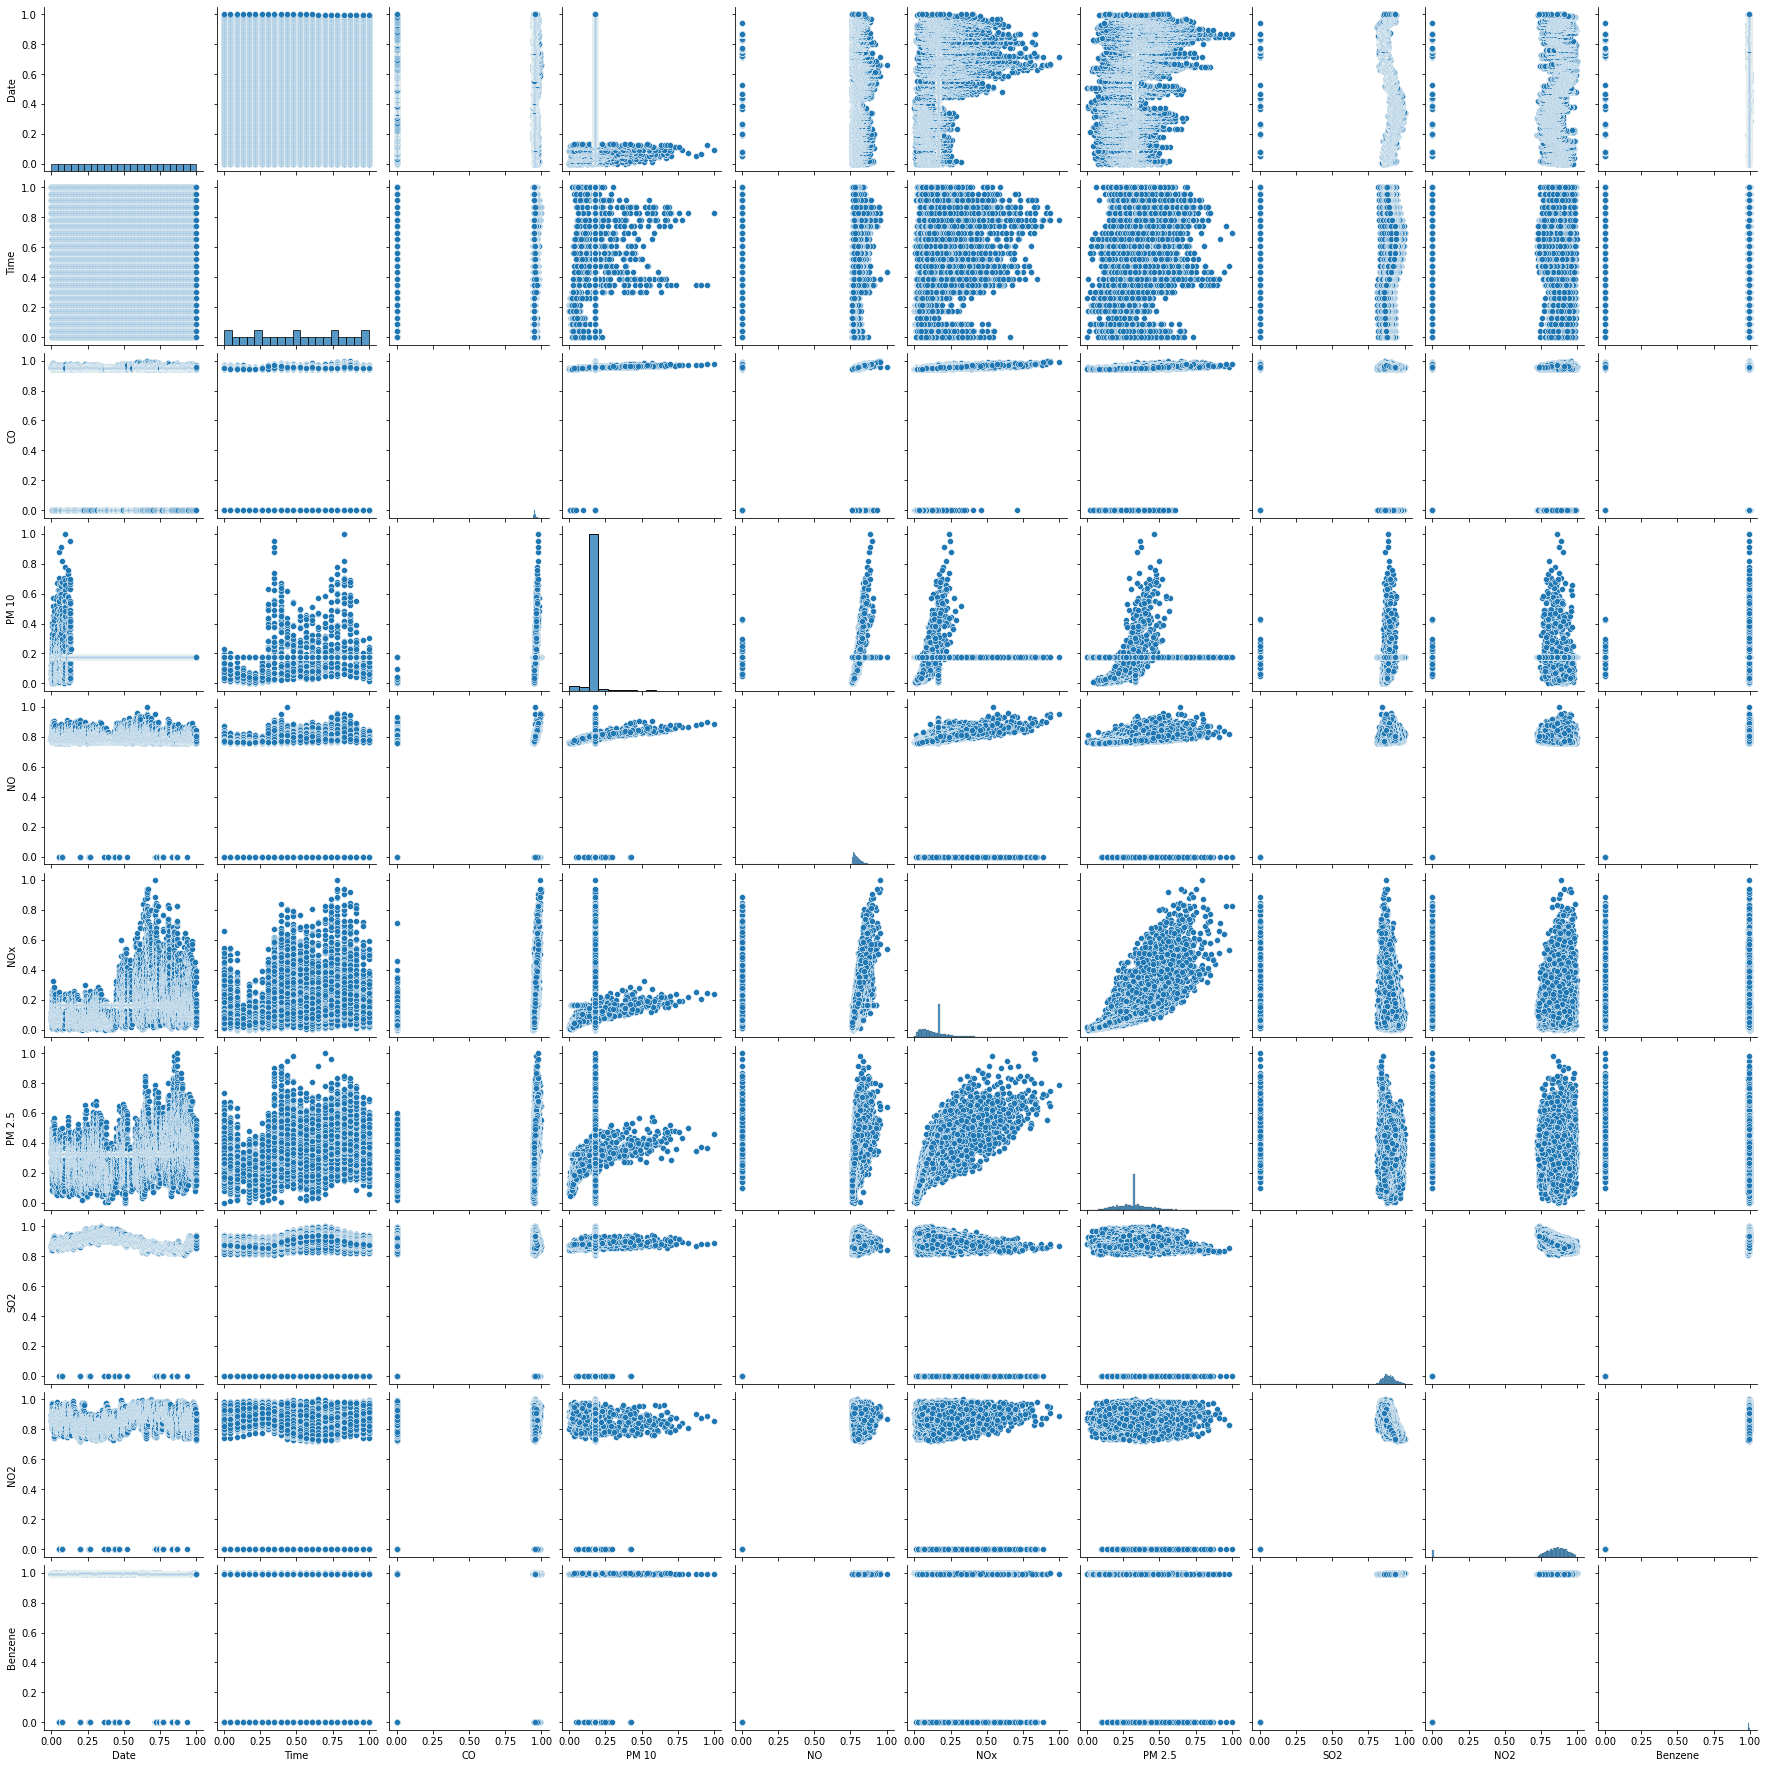

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num = air_quality.keys()
scaler = MinMaxScaler()
scaler.fit(air_quality[num])
air_quality[num] = scaler.transform(air_quality[num])

snc.pairplot(air_quality[["Date","Time","CO","PM 10","NO","NOx","PM 2.5","SO2","NO2","Benzene"]],diag_kind = "auto")

In [ ]:
features=air_quality
target=air_quality['PM 2.5']
features

,Date,Time,CO,PM 10,NO,NOx,PM 2.5,SO2,NO2,Benzene
0,1.583798e+18,-2.208924e+18,2.6,150.000000,11.9,166.0,113.0,13.6,48.9,0.7578
1,1.583798e+18,-2.208920e+18,2.0,112.000000,9.4,103.0,92.0,13.3,47.7,0.7255
2,1.583798e+18,-2.208917e+18,2.2,88.000000,9.0,131.0,114.0,11.9,54.0,0.7502
3,1.583798e+18,-2.208913e+18,2.2,80.000000,9.2,172.0,122.0,11.0,60.0,0.7867
4,1.583798e+18,-2.208910e+18,1.6,51.000000,6.5,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,1.617494e+18,-2.208953e+18,3.1,218.811816,13.5,472.0,190.0,21.9,29.3,0.7568
9353,1.617494e+18,-2.208949e+18,2.4,218.811816,11.4,353.0,179.0,24.3,23.7,0.7119
9354,1.617494e+18,-2.208946e+18,2.4,218.811816,12.4,293.0,175.0,26.9,18.3,0.6406
9355,1.617494e+18,-2.208942e+18,2.1,218.811816,9.5,235.0,156.0,28.3,13.5,0.5139


In [ ]:
features=features.drop('Date',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('PM 2.5',axis=1)
features=features.drop('NO',axis=1)
features=features.drop('CO',axis=1)
features=features.drop('Benzene',axis=1)


features

,PM 10,NOx,SO2,NO2
0,150.000000,166.0,13.6,48.9
1,112.000000,103.0,13.3,47.7
2,88.000000,131.0,11.9,54.0
3,80.000000,172.0,11.0,60.0
4,51.000000,131.0,11.2,59.6
...,...,...,...,...
9352,218.811816,472.0,21.9,29.3
9353,218.811816,353.0,24.3,23.7
9354,218.811816,293.0,26.9,18.3
9355,218.811816,235.0,28.3,13.5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

y_test.tail()

5218    113.091251
4412    135.000000
1070     86.000000
3337    111.000000
856     127.000000
Name: PM 2.5, dtype: float64

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print("Predicted values of PM 2.5:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape


Predicted values of PM 2.5: [122.33959979  93.0251117   71.30221793 ... 101.17619791  99.12008725
 139.10610229]


(2340,)

In [ ]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.6141883474570524


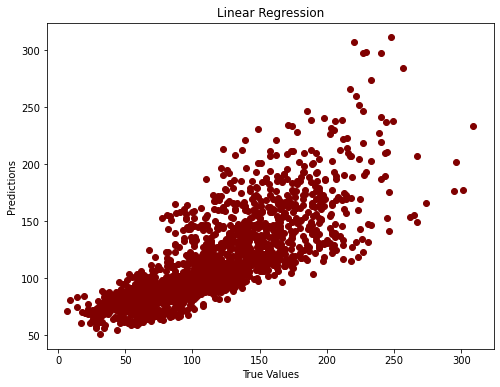

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='maroon')
plt.title('Linear Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

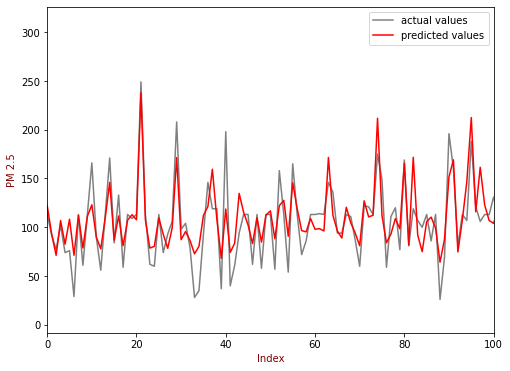

In [ ]:
x = np.array(y_test)
y = np.array(y_pred)
plt.figure(figsize=(8,6))
plt.plot(x, color='grey')
plt.plot(y,color='red')
plt.xlim(0,100)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
a=Lasso(alpha=0.5)
a.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("R^2 on train set : {}".format(a.score(X_train, y_train)))

R^2 on train set : 0.6179847082669695


In [ ]:
print("Predicted values of PM 2.5:", a.predict(X_test))
y_predl = regressor.predict(X_test)
y_predl.shape

Predicted values of PM 2.5: [122.27467046  92.94270924  71.36157444 ... 101.18480536  99.05613787
 139.09106885]


(2340,)

In [ ]:
print("R^2 on test set : {}".format(a.score(X_test, y_test)))

R^2 on test set : 0.614191517815743


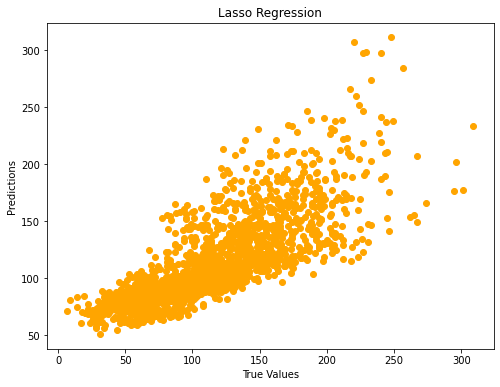

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_predl,color='orange')
plt.title('Lasso Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

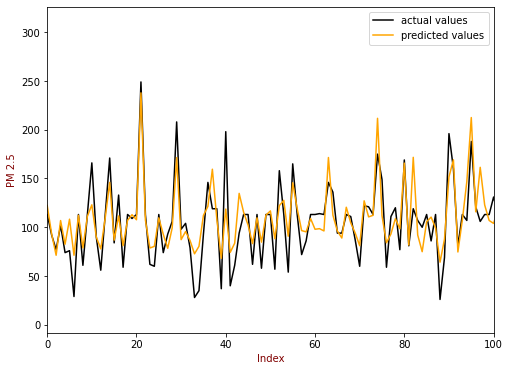

In [ ]:
x = np.array(y_test)
y = np.array(y_predl)
plt.figure(figsize=(8,6))
plt.plot(x, color='black')
plt.plot(y, color='orange')
plt.xlim(0,100)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9986319713153796


In [ ]:
print("Predicted values of PM 2.5:", dtr.predict(X_test))
y_predt = regressor.predict(X_test)
y_predt.shape

Predicted values of PM 2.5: [113.09125081  74.          96.         ...  83.         118.
 158.        ]


(2340,)

In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6550794209302657


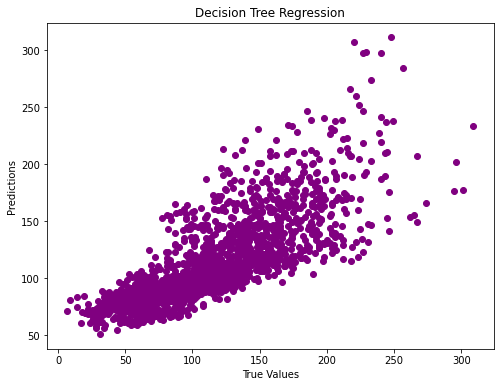

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_predt,color='purple')
plt.title('Decision Tree Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

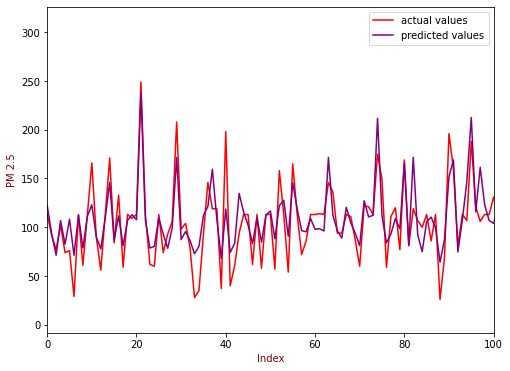

In [ ]:
x = np.array(y_test)
y = np.array(y_predt)
plt.figure(figsize=(8,6))
plt.plot(x, color='red')
plt.plot(y, color='purple')
plt.xlim(0,100)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

# AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(adb.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.7540491426466857


In [ ]:
print("Predicted values of PM 2.5:", adb.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values of PM 2.5: [127.44361188  67.29130435  82.80630513 ... 107.87290301  91.51689288
 136.03561116]


(2340,)

In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(adb.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7538727175983595


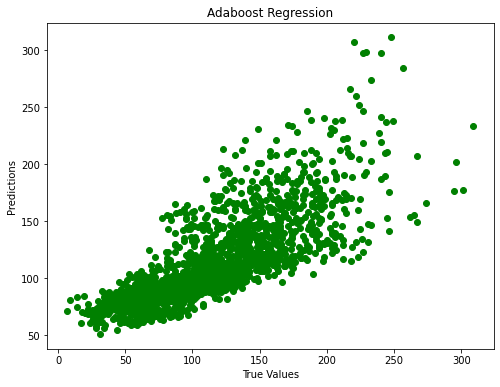

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='green')
plt.title('Adaboost Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

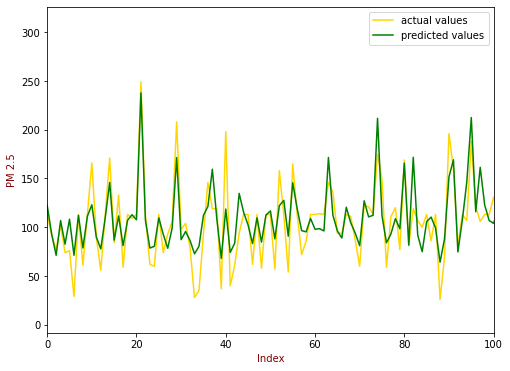

In [ ]:
x = np.array(y_test)
y = np.array(y_pred)
plt.figure(figsize=(8,6))
plt.plot(x, color='gold')
plt.plot(y,color='green')
plt.xlim(0,100)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(knn.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8640989579819277


In [ ]:
print("Predicted values of PM 2.5:", knn.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values of PM 2.5: [113.09125081  67.          79.         ... 118.8        105.2
 155.8       ]


(2340,)

In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(knn.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7832305143820857


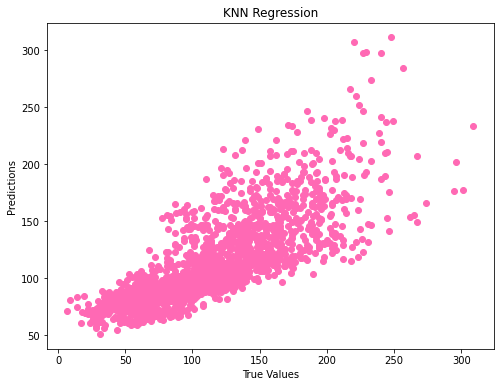

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='hotpink')
plt.title('KNN Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

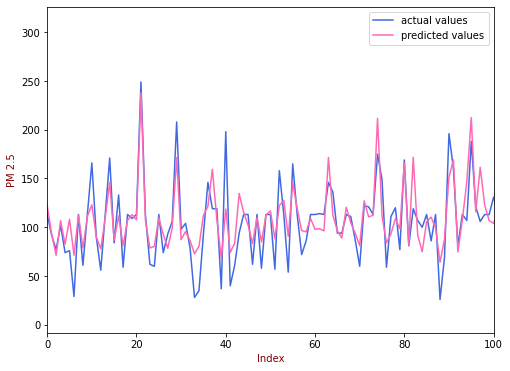

In [ ]:
x = np.array(y_test)
y = np.array(y_pred)
plt.figure(figsize=(8,6))
plt.plot(x,color='royalblue')
plt.plot(y,color='hotpink')
plt.xlim(0,100)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
f'Coefficient of determination R^2 on train set {forest.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.9746222595529226'

In [ ]:
print("Predicted values of PM 2.5:", dtr.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values of PM 2.5: [113.09125081  74.          96.         ...  83.         118.
 158.        ]


(2340,)

In [ ]:
f'Coefficient of determination R^2 on test set {forest.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.8095039009868773'

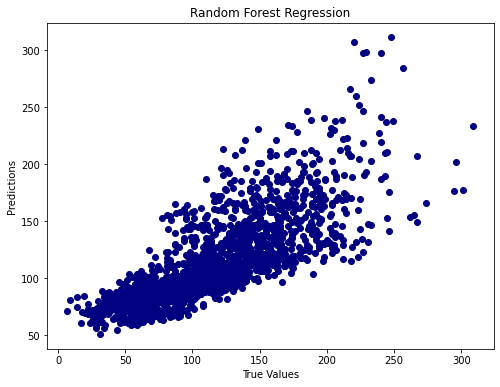

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='navy')
plt.title('Random Forest Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

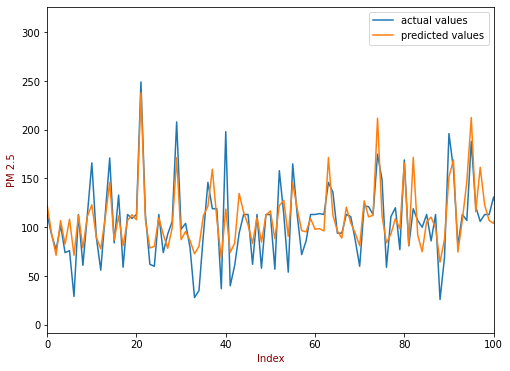

In [ ]:
x = np.array(y_test)
y = np.array(y_pred)
plt.figure(figsize=(8,6))
plt.plot(x)
plt.plot(y)
plt.xlim(0,100)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

# Performance Comparion

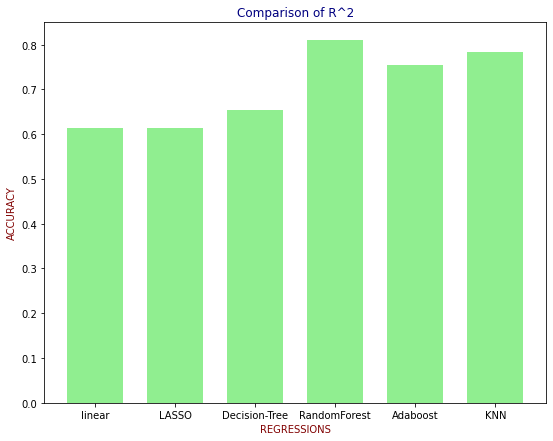

In [ ]:
x=['linear','LASSO','Decision-Tree','RandomForest','Adaboost','KNN']
y=[regressor.score(X_test, y_test),a.score(X_test, y_test),dtr.score(X_test, y_test),forest.score(X_test, y_test),adb.score(X_test, y_test),knn.score(X_test, y_test)]
plt.figure(figsize=(9,7))
plt.bar(x,y, width = 0.7 ,color='lightgreen')
plt.xlabel('REGRESSIONS', color='maroon')
plt.ylabel("ACCURACY", color='maroon' )
plt.title('Comparison of R^2', color='navy')
plt.show()